In [22]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


/Users/kartik/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [23]:
#ds_train = pd.read_csv('/Users/kartik/Desktop/ml/mnist_data/test.csv')
ds_test = pd.read_csv('/Users/kartik/Desktop/ml/mnist_data/train.csv')

In [24]:
# data = ds_train.values
data = ds_test.values[:10000,1:]
labels= ds_test.values[:10000,0]
print labels.shape
print data.shape
means = np.mean(data[:, :], axis=0)
cm = np.cov(data[:, :], rowvar=0)

(10000,)
(10000, 784)


In [25]:
data_std=(data-means)/(data.std(axis=0)+1e-03)
print data.shape

mean_std=np.mean(data_std, axis=0)
cm_std=np.cov(data_std,rowvar=0)

(10000, 784)


In [26]:
print mean_std[:10]
print cm_std[:10,:10] 
print cm_std[120:125,120:125]

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 1.00003603  0.83219568  0.59251765  0.40233516  0.28610748]
 [ 0.83219568  1.0000521   0.81970253  0.57589323  0.40051534]
 [ 0.59251765  0.81970253  1.0000618   0.83654754  0.59859368]
 [ 0.40233516  0.57589323  0.83654754  1.00006827  0.83795979]
 [ 0.28610748  0.40051534  0.59859368  0.83795979  1.00007209]]


In [27]:
eig_val_cm, eig_vec_cm= np.linalg.eig(cm)
eig_val_std, eig_vec_std= np.linalg.eig(cm_std)

In [28]:
print eig_val_cm[:5]
print eig_val_std[:5]

[ 333627.10589703+0.j  248191.89866289+0.j  213545.88322891+0.j
  186764.92863065+0.j  165983.39651654+0.j]
[ 40.71752865  28.79193879  27.20316214  20.99268258  18.04222747]


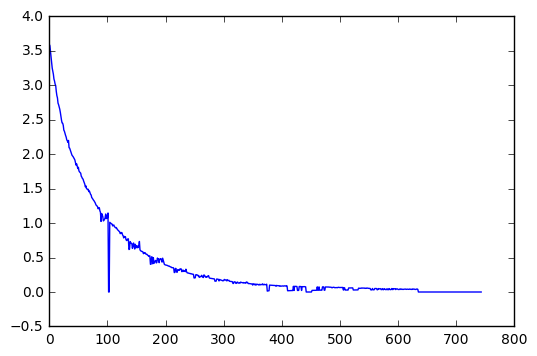

In [29]:
plt.figure(0)
plt.plot(eig_val_std[40:])
plt.show()

In [30]:
eig_cm= np.cumsum(eig_val_std)/np.sum(eig_val_std)
print eig_cm.shape

(784,)


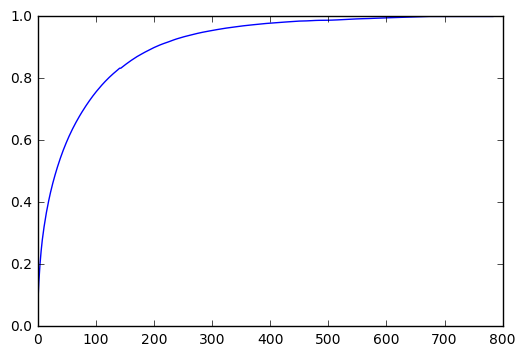

In [31]:
plt.figure(1)
plt.plot(eig_cm)
plt.show()

In [32]:
for ix in range(eig_cm.shape[0]):
    if eig_cm[ix]>=0.95:
        print ix
        break

287


In [33]:
print eig_vec_std.shape

(784, 784)


In [34]:
eig_pairs = [(np.abs(eig_val_std[i]), eig_vec_std[:,i])
             for i in range(len(eig_val_std))]
eig_pairs.sort(key=lambda x:x[0])
eig_pairs.reverse()

0.0


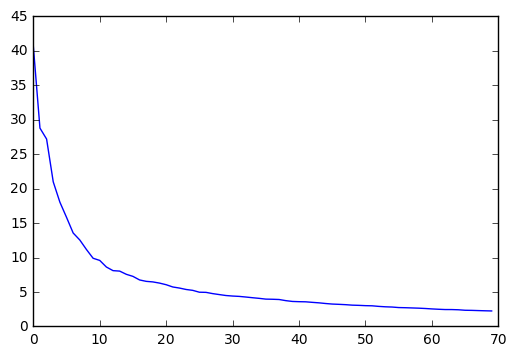

In [35]:
vals = np.zeros(len(eig_pairs))
for ix in range(len(eig_pairs)):
    vals[ix] = eig_pairs[ix][0]
print vals[700]
plt.plot(vals[:70])
plt.show()

In [36]:
eig_cm=np.cumsum(vals)/np.sum(vals)

for ix in range(eig_cm.shape[0]):
    if eig_cm[ix] >= 0.99:
        print ix
        break

491


0.0


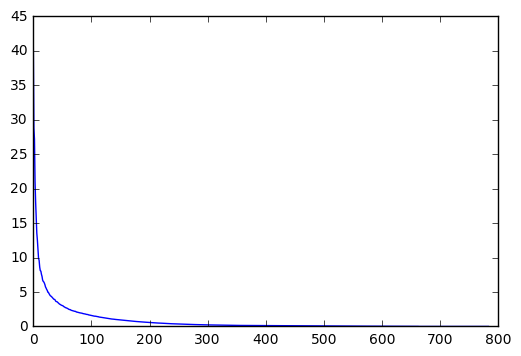

In [37]:
vals = np.zeros(len(eig_pairs))
for ix in range(len(eig_pairs)):
    vals[ix] = eig_pairs[ix][0]
print vals[700]
plt.plot(vals)
plt.show()

In [38]:
# select k dimensions out of all dimensions for feature space
k = 442
d = eig_pairs[0][1].shape[0]
selected = []

for ix in range(k):
    selected.append(eig_pairs[ix][1].reshape(d, 1))

# Now stack the selected eigenvectors in W matrix
mat_W = np.hstack(selected)
print "moving to save the new dataset"
print mat_W.shape

moving to save the new dataset
(784, 442)


In [39]:
print mat_W.shape
print data_std.T.shape
y = data_std.dot(mat_W)
print y.shape


(784, 442)
(784, 10000)
(10000, 442)


In [40]:
import sklearn
from sklearn.decomposition import PCA

In [41]:
pca=PCA(n_components=784)

X= pca.fit_transform(data_std)
print X.shape


(10000, 784)


In [42]:
print data_std[:2,:10]
print X[:2, :10]


[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[ -4.94969277  -5.44814223   3.84322968  -1.54955748   5.02521766
    1.31207873   4.59194049  -4.71220046   0.71160375  -1.75838443]
 [ 18.96619894   6.83400594   1.02793813  -2.50152402   3.05102669
   -1.7033299   -3.52023689   0.28222766  -4.22087361  -3.29180948]]


In [43]:
trans_cm = np.cov(X,rowvar=0)

In [44]:
print trans_cm[:5,:5]

[[  4.07175286e+01  -5.96613579e-15   1.29530683e-14  -7.34206175e-15
   -1.66709997e-15]
 [ -5.96613579e-15   2.87919388e+01  -3.22107022e-14   1.22623517e-14
    1.20164793e-14]
 [  1.29530683e-14  -3.22107022e-14   2.72031621e+01  -8.31418143e-15
    2.43882655e-15]
 [ -7.34206175e-15   1.22623517e-14  -8.31418143e-15   2.09926826e+01
    8.65527605e-16]
 [ -1.66709997e-15   1.20164793e-14   2.43882655e-15   8.65527605e-16
    1.80422275e+01]]


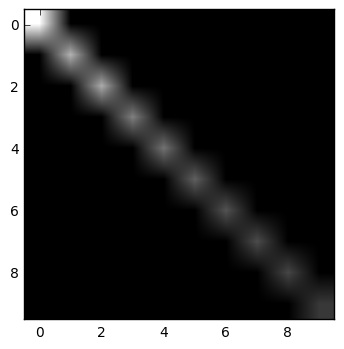

In [45]:
tm= np.asarray(trans_cm,dtype='uint8')
plt.imshow(tm[:10,:10],cmap='gray')
plt.show()

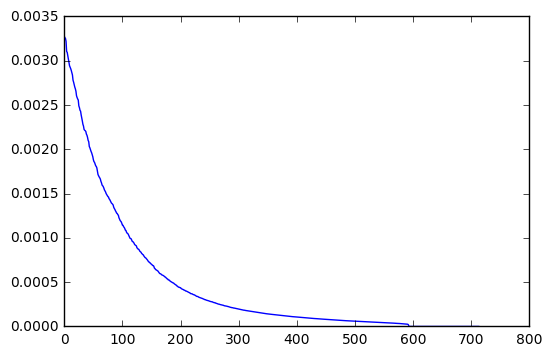

In [46]:
v=pca.explained_variance_ratio_
plt.plot(v[70:])
plt.show()

In [47]:
cs=np.cumsum(v)/np.sum(v)

408


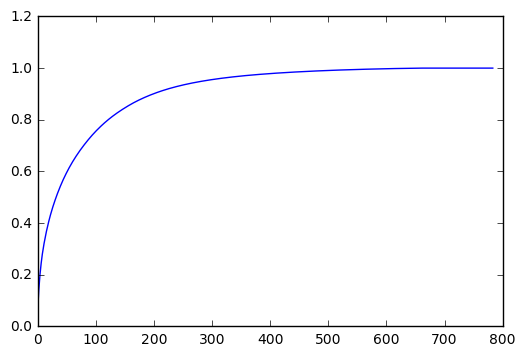

In [48]:
for ix in range(cs.shape[0]):
    if cs[ix]>=0.98:
        print ix
        break
plt.plot(cs)

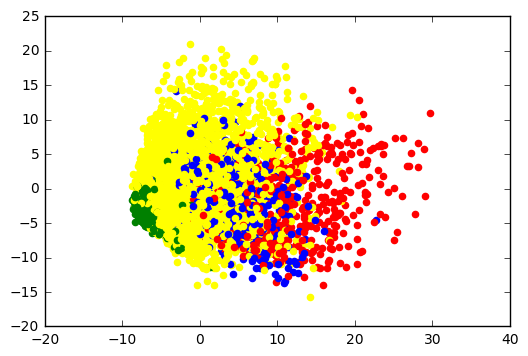

In [49]:
for ix in range(5000):
    if labels[ix]==0:
        plt.scatter(X[ix,0],X[ix,1],color='red')
    elif labels[ix]==1:
        plt.scatter(X[ix,0],X[ix,1],color='green')
    elif labels[ix]==2:
        plt.scatter(X[ix,0],X[ix,1],color='blue')
    else:
        plt.scatter(X[ix,0],X[ix,1],color='yellow')
plt.show()

In [50]:
dim=[2,3,5,7,10,20,50,128, 256, 314, 452]
acc = []

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

In [58]:
for ix in dim:
    pca=PCA(n_components=ix)
    X=pca.fit_transform(data_std)
    split= int(0.9*data_std.shape[0])
    X_train= X[:split, :]
    X_test=X[split:,:]
    y_train= labels[:split]
    y_test= labels[split:]
    
    rf=RandomForestClassifier(n_estimators=40, random_state=31)
    rf.fit(X_train, y_train)
    
    acc.append(rf.score(X_test,y_test)*100)
print acc

[36.449999999999996, 55.75, 70.0, 79.049999999999997, 82.299999999999997, 85.75, 85.049999999999997, 82.849999999999994, 79.849999999999994, 79.200000000000003, 78.299999999999997, 35.0, 52.600000000000001, 74.299999999999997, 83.5, 87.599999999999994, 91.0, 92.100000000000009, 91.5, 89.0, 90.299999999999997, 88.0]


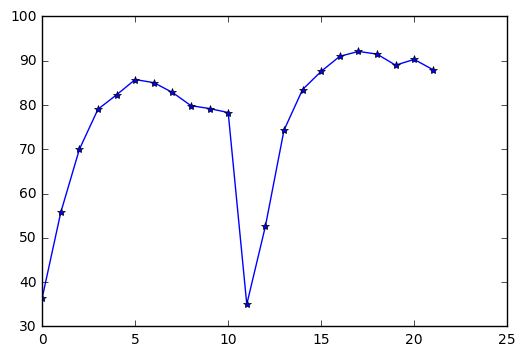

In [59]:
plt.plot(acc,'*-')

In [56]:
acc=[]
for ix in dim:
    pca=PCA(n_components=ix)
    X=pca.fit_transform(data_std)
    split= int(0.9*data_std.shape[0])
    X_train= X[:split, :]
    X_test=X[split:,:]
    y_train= labels[:split]
    y_test= labels[split:]
    
    knn=KNN(n_neighbors=200)
    knn.fit(X_train, y_train)
    
    acc.append(knn.score(X_test,y_test)*100)
print acc

[36.449999999999996, 55.75, 70.0, 79.049999999999997, 82.299999999999997, 85.75, 85.049999999999997, 82.849999999999994, 79.849999999999994, 79.200000000000003, 78.299999999999997]


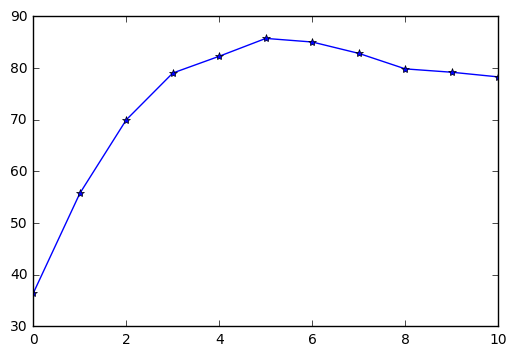

In [57]:
plt.plot(acc,'*-')